# Dynamic Systems

## Continuous Transfer functions creation with sympy

In [1]:
import sympy as sp
from matplotlib import pyplot as plt

%config InlineBackend.figure_formats = ['svg']

# Creation of the s and t symbols
t, s = sp.symbols('t, s')

H = 2/(s**2+0.4*s+2)
H

2/(s**2 + 0.4*s + 2)

## Finding Poles and Zeros

Poles are just the zeros of the denominator

In [2]:
zeros = sp.solve(H, s)
poles = sp.solve(s**2+0.4*s+2, s)
print(zeros)
print(poles)

[]
[-0.2 - 1.4*I, -0.2 + 1.4*I]


We get sympy complex numbers. If we want regular python complex we can do:

In [3]:
poles = [complex(p) for p in poles]
poles

[(-0.2-1.4j), (-0.2+1.4j)]

## The series connection

In [15]:
H5 = 1 / (5*s + 1)
H6=1 / (10*s + 1)
H5 * H6

1/((5*s + 1)*(10*s + 1))

`sympy` contains many functions to simplify mathematical expressions (`sp.simplify()`, `sp.expand()`, `sp.factor()`, `sp.collect()`, `sp.apart()`, `sp.cancel()`).

Here `sp.cancel()` is a good fit to get the output we used to:

In [16]:
sp.cancel(H5 * H6)

1/(50*s**2 + 15*s + 1)

## The parallel connection

In [17]:
sp.cancel(H5 + H6)


(15*s + 2)/(50*s**2 + 15*s + 1)

## The feedback connection

In [18]:
sp.cancel(H5 / (1 + H5*H6))

(10*s + 1)/(50*s**2 + 15*s + 2)

## Impulse response

The impulse response is the inverse Laplace transform of the transfer function

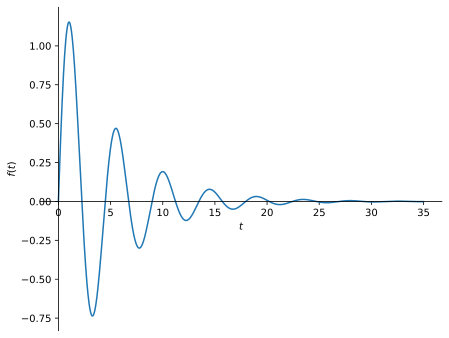

In [ ]:
imp_resp = sp.inverse_laplace_transform(H, s, t)

# To plot a sympy expression we must use `sp.plot` which use matplotlib under the hood
sp.plot(imp_resp, (t, 0, 35))
plt.show()

## Step response

The step response is the inverse Laplace transform of the transfer function divided by $s$

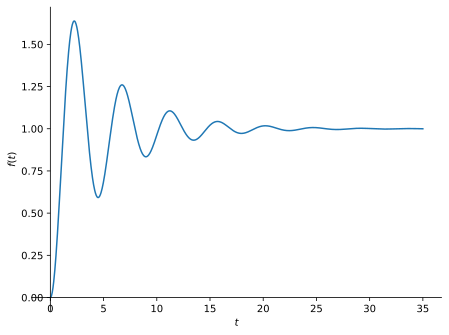

In [8]:
step_resp = sp.inverse_laplace_transform(H/s, s, t)

sp.plot(step_resp, (t, 0, 35))
plt.show()

## Time-related response to any signal

First we need to define the input signal symbolically with `sympy`

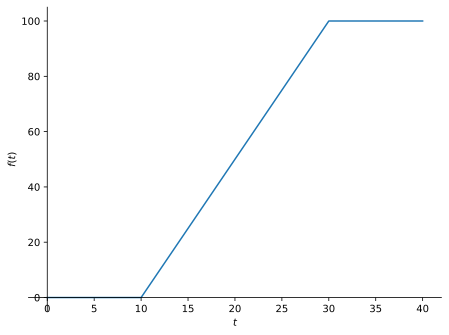

In [9]:
u = sp.Piecewise(
    (0, t <= 10),
    (5 * t - 50, (t > 10) & (t < 30)),
    (5 * 30 - 50, t >= 30)
)

sp.plot(u, (t, 0, 40))
plt.show()

The transfer function is related to the Laplace transforms of the input and output signals by this relation: $$Y(s) = H(s) \cdot U(s)$$

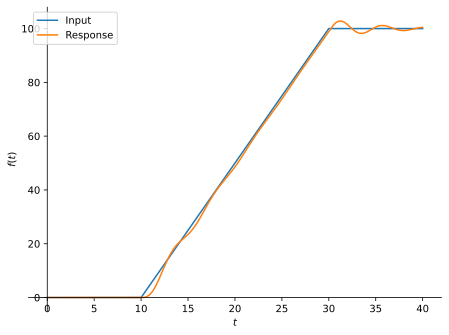

In [10]:
U = sp.laplace_transform(u, t, s, noconds=True)
Y = H * U
y = sp.inverse_laplace_transform(Y, s, t)

graph = sp.plot(u, (t, 0, 40), show=False, label="Input", legend=True)
graph.extend(sp.plot(y, (t, 0, 40), show=False, label="Response"))
graph.show()

## Use a `sympy` expression as a `numpy` function

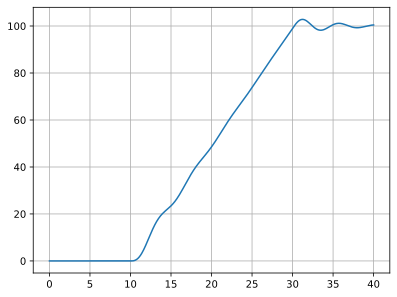

In [11]:
import numpy as np

y_np = sp.lambdify(t, y, "numpy")

tm = np.linspace(0, 40, 500)
ym = y_np(tm)

plt.plot(tm, ym)
plt.grid()
plt.show()